1\. **Kernel Density Estimate**

Produce a KDE for a given distribution (by hand, not using seaborn!):

* Fill a numpy array, x,  of len(N) (with N=O(100)) with a variable normally distributed, with a given mean a standard deviation
* Fill an histogram in pyplot taking properly care about the aesthetic
   * use a meaningful number of bins
   * set a proper y axis label
   * set proper value of y axis major ticks labels (e.g. you want to display only integer labels)
   * display the histograms as data points with errors (the error being the poisson uncertainty)
* for every element of x, create a gaussian with the mean corresponding the element value and std as a parameter that can be tuned. The std default value should be:
$$ 1.06 * x.std() * x.size ^{-\frac{1}{5.}} $$
you can use the scipy function `stats.norm()` for that.
* In a separate plot (to be placed beside the original histogram), plot all the gaussian functions so obtained
* Sum (with np.sum()) all the gaussian functions and normalize the result such that the integral matches the integral of the original histogram. For that you could use the `scipy.integrate.trapz()` method


30
-3.571447510549419


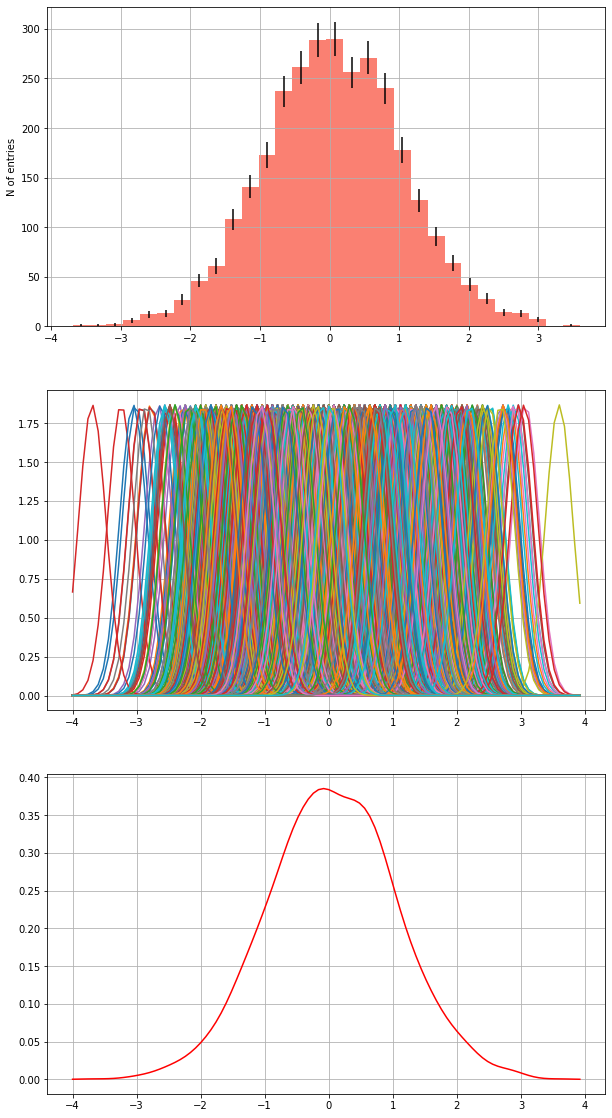

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as sst
import scipy.integrate as sint

std=1.0
n=3000
x=np.random.normal(scale=std,size=n)

histogram,edge=np.histogram(x,bins=30)
print(len(histogram))
edges=(edge[1:]+edge[:-1])*0.5
print(edges[0])
fig,ax=plt.subplots(3,1,figsize=[10,20])

ax[0].hist(x,color='salmon',bins=30)
ax[0].errorbar(edges,histogram,yerr=np.sqrt(histogram),ls='',color='black')

#ax[0].hist(x,color='teal',bins=30)

#plt.xlabel('$x$')
ax[0].set_ylabel('N of entries')
ax[0].set_yticks(np.arange(0,350,50))
stdx=std*1.06*n**(-0.2)

x_gauss=[sst.norm(xi,stdx) for xi in x]

x_plot=np.arange(-4,4,8.0/100.0)

x_all=np.zeros([n,len(x_plot)])
for i in range(n):
    x_all[i]=x_gauss[i].pdf(x_plot)

for x in x_all:
    ax[1].plot(x_plot,x)
    
x_sum=np.sum(x_all,axis=0)
normal=sint.trapz(x_sum,x_plot)
x_sum/=normal

ax[2].plot(x_plot,x_sum,color='red')

    
ax[0].grid()
ax[1].grid()
ax[2].grid()
#ax[3].plot(x_plot,sum_x_plot)
plt.show()

2\. **Color-coded scatter plot**

Produce a scatter plot out of a dataset with two categories

* Write a function that generate a 2D datasets of 2 categories. Each category should distribute as a 2D gaussian with a given mean and std (clearly it is better to have different values means..)
* Display the dataset in a scatter plot marking the two categories with different marker colors.

An example is given below

You can try to make the procedure more general by allowing a given number $n\ge 2$ of categories

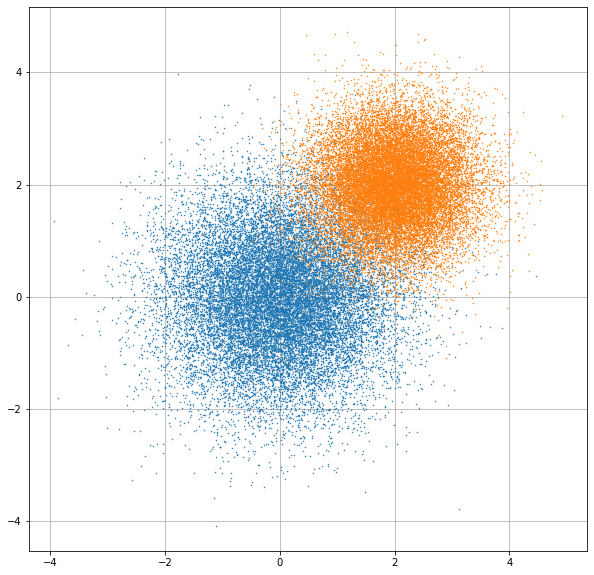

In [3]:
def random_2D_norm(std1=[1,1],std2=[0.5,0.5],mean1=[0,0],mean2=[2,2],n=20000):
    return np.random.multivariate_normal(mean1,np.diag(std1),n), np.random.multivariate_normal(mean2,np.diag(std2),n)
A1,A2=random_2D_norm()
fig,ax=plt.subplots(figsize=[10,10])
ax.plot(A1[:,0],A1[:,1],'.',markersize=1)
ax.plot(A2[:,0],A2[:,1],'.',markersize=1)
ax.grid()
plt.show()

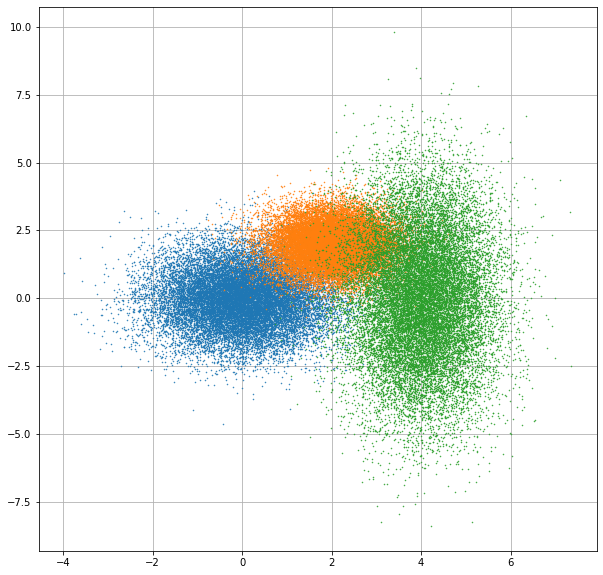

In [4]:
#More general func

def random_2D_norm2(stds=[np.diag([1,1]),np.diag([0.5,0.5])],means=[np.array([0,0]),np.array([2,2])],n=20000):
    n_cat=len(stds)
    
    return [np.random.multivariate_normal(means[i],stds[i],n) for i in range(n_cat)]

A=random_2D_norm2(stds=[np.diag([1,1]),np.diag([0.5,0.5]),np.diag([0.7,5])],means=[np.array([0,0]),np.array([2,2]),np.array([4,0])],n=20000)
fig,ax=plt.subplots(figsize=[10,10])
for a in A:
    ax.plot(a[:,0],a[:,1],'.',markersize=1)
ax.grid()
plt.show()

3\. **Profile plot**

Produce a profile plot from a scatter plot.
* Download the following dataset and load it as a pandas dataframe:
```bash
wget https://www.dropbox.com/s/hgnvyj9abatk8g6/residuals_261.npy
```
Note that you should use the `np.load()` function to load the file as a numpy array, call the `.item()` method, and then pass it to the `pd.DataFrame()` constructor.
* Inspect the dataset, you'll find two variables (features)
* Clean the sample by selecting the entries (rows) with the variable "residual" in absolute value smaller than 2
* perform a linear regression of "residuals" versus "distances" using `scipy.stats.linregress()` 
* plot a seaborn jointplot of  "residuals" versus "distances", having seaborn performing a linear regression. The result of the regression should be displayed on the plot
* Fill 3 numpy arrays
  * x, serving as an array of bin centers for the "distance" variable. It should range from 0 to 20 with reasonable number of steps (bins)
  * y, the mean values of the "residuals", estimated in slices (bins) of "distance"
  * erry, the standard deviation of the  of the "residuals", estimated in slices (bins) of "distance"
* Plot the profile plot on top of the scatter plot

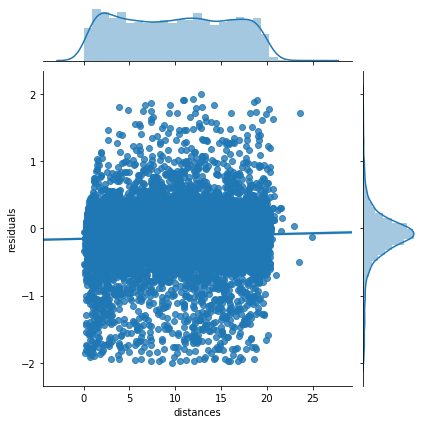

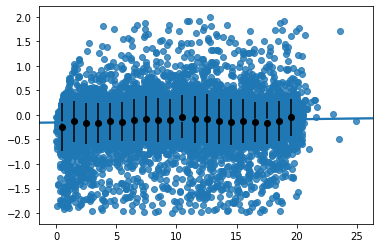

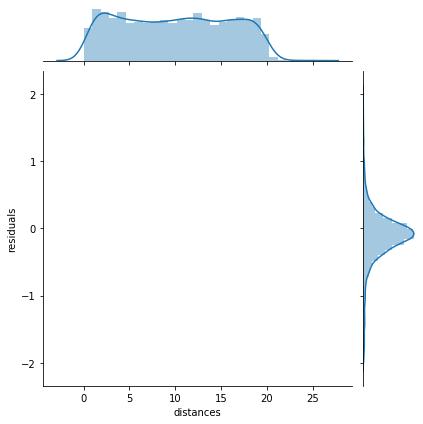

In [5]:
import pandas as pd
import scipy.stats as sst
import seaborn as sns

df=pd.DataFrame(np.load('residuals_261.npy',allow_pickle=True).item())
df2=df[abs(df['residuals'])<2.0]

slope,intercept,rvalue,pvalue,stderr=sst.linregress(df2['residuals'],df2['distances'])

sns.jointplot(x='distances',y='residuals',data=df2,kind='reg')
hist,x=np.histogram(df2['distances'],range=[0,20],bins=20)
x_center=(x[1:]+x[:-1])*0.5
y=np.zeros(len(x_center))
erry=np.zeros(len(x_center))
for i in range(len(x_center)):
    df3=df2[df2['distances']>x[i]]
    y[i]=df3['residuals'][df3['distances']<x[i+1]].mean()
    erry[i]=df3['residuals'][df3['distances']<x[i+1]].std()
                          
#print(y)
#print(erry)
fig,ax=plt.subplots()
ax.errorbar(x_center,y,yerr=erry,color='black',marker='o',linestyle='' )
#sns.pointplot(x_center,y,color='black',linestyles='',ax=ax)
sns.jointplot(x='distances',y='residuals',data=df2,kind='reg',ax=ax)


In [ ]:
df2